In [4]:
import pandas as pd
df = pd.read_csv("job_offers.csv")
df

,CGPA,Communication,Aptitude,ProgrammingSkill,JobOffered
0,2,1,1,1,1
1,1,1,1,1,1
2,0,0,0,1,0
3,0,1,0,0,0
4,2,1,1,0,1
5,2,1,1,1,1
6,1,0,0,0,0
7,1,0,0,1,0
8,2,1,1,1,1
9,1,1,1,1,1


In [5]:
x = df.drop("JobOffered",axis=1)
x

,CGPA,Communication,Aptitude,ProgrammingSkill
0,2,1,1,1
1,1,1,1,1
2,0,0,0,1
3,0,1,0,0
4,2,1,1,0
5,2,1,1,1
6,1,0,0,0
7,1,0,0,1
8,2,1,1,1
9,1,1,1,1


In [8]:
y = df[["JobOffered"]]
y

,JobOffered
0,1
1,1
2,0
3,0
4,1
5,1
6,0
7,0
8,1
9,1


In [11]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [12]:
dtree = DecisionTreeClassifier(criterion="entropy", max_depth=3)

In [13]:
model = dtree.fit(x,y)

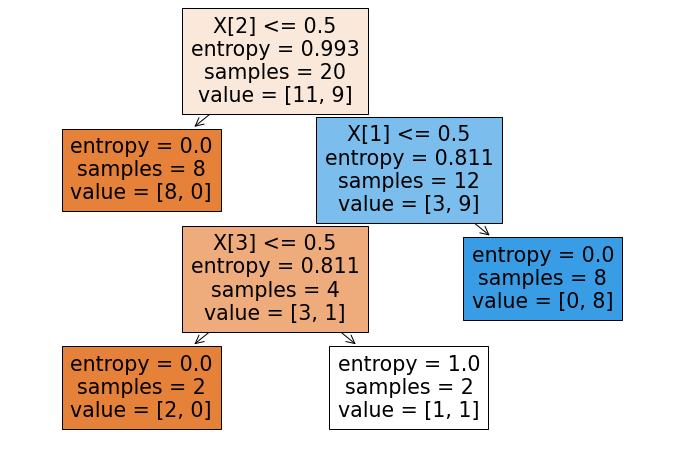

In [14]:
#plot tree
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plot_tree(model, filled=True)
plt.show()

In [16]:
#COnfusion matrix
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x)
cm = confusion_matrix(y, y_pred)
cm

array([[11,  0],
       [ 1,  8]], dtype=int64)

In [17]:
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]

In [18]:
acc = (TP + TN)/(TP + TN + FP + FN)
acc


0.95

In [19]:
err = 1-acc
err

0.050000000000000044

In [20]:
sensitivity = TP / (TP + FN)
sensitivity

0.8888888888888888

In [21]:
specificity = TN / (TN + FP)
specificity

1.0

In [60]:
import pandas as pd
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [61]:
x = df.drop("Outcome", axis=1)
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [62]:
y = df[["Outcome"]]
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [63]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
#print(x_train)
#print(x_test)
#print(y_train)
#print(y_test)

In [64]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
dtree = DecisionTreeClassifier(criterion="entropy", max_depth=26)
model = dtree.fit(x_train,y_train)

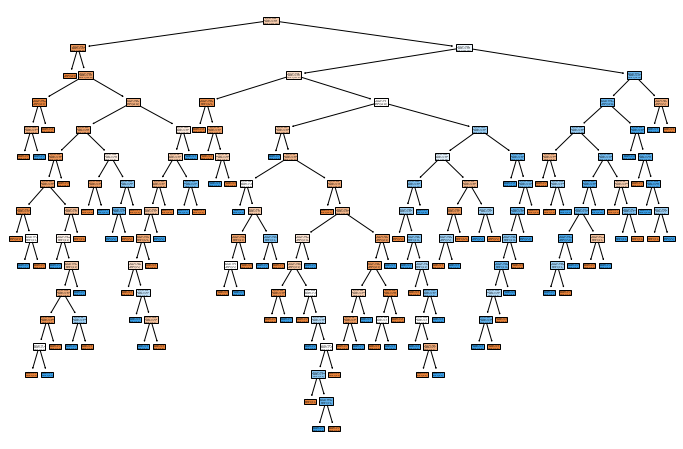

In [65]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plot_tree(model, filled=True)
plt.show()

In [69]:
#confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[120,  40],
       [ 35,  36]], dtype=int64)

In [70]:
tn = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]
tp = cm[1][1]

In [71]:
acc = (TP + TN)/(TP + TN + FP + FN)
print(acc)

err = 1-acc
print(err)

sensitivity = TP / (TP + FN)
print(sensitivity)

specificity = TN / (TN + FP)
print(specificity)

0.95
0.050000000000000044
0.8888888888888888
1.0


In [79]:
import pandas as pd
df = pd.read_csv("drug200.csv")
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [80]:
y = df[["Drug"]]
y

,Drug
0,drugY
1,drugC
2,drugC
3,drugX
4,drugY
...,...
195,drugC
196,drugC
197,drugX
198,drugX


In [81]:
df = df.drop("Drug",axis=1)
df

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043
...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567
196,16,M,LOW,HIGH,12.006
197,52,M,NORMAL,HIGH,9.894
198,23,M,NORMAL,NORMAL,14.020


In [83]:
x = pd.get_dummies(df, drop_first = True)
x


,Age,Na_to_K,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
0,23,25.355,0,0,0,0
1,47,13.093,1,1,0,0
2,47,10.114,1,1,0,0
3,28,7.798,0,0,1,0
4,61,18.043,0,1,0,0
...,...,...,...,...,...,...
195,56,11.567,0,1,0,0
196,16,12.006,1,1,0,0
197,52,9.894,1,0,1,0
198,23,14.020,1,0,1,1


In [84]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
#print(x_train)
#print(x_test)
#print(y_train)
#print(y_test)

In [85]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
dtree = DecisionTreeClassifier(criterion="entropy", max_depth=26)
model = dtree.fit(x_train,y_train)

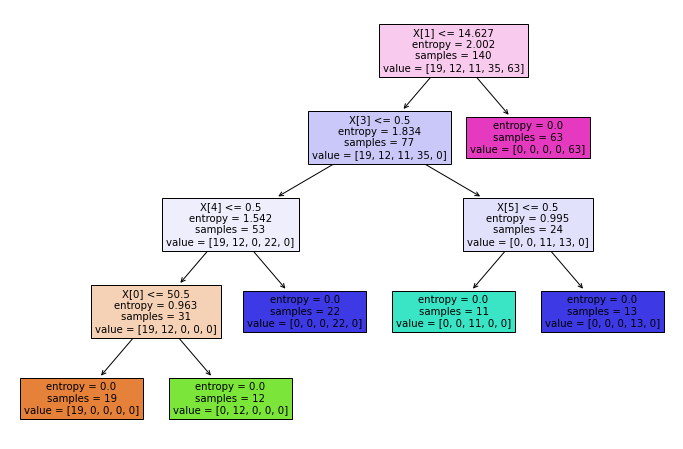

In [86]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plot_tree(model, filled=True)
plt.show()

In [87]:
#confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 4,  0,  0,  0,  0],
       [ 0,  4,  0,  0,  0],
       [ 0,  0,  5,  0,  0],
       [ 0,  0,  0, 18,  1],
       [ 0,  0,  0,  0, 28]], dtype=int64)

In [2]:
TP = 4
FP = 2
TN = 3
FN = 1
acc = (TP + TN)/(TP + TN + FP + FN)
print(acc)

err = 1-acc
print(err)

sensitivity = TP / (TP + FN)
print(sensitivity)

specificity = TN / (TN + FP)
print(specificity)

0.7
0.30000000000000004
0.8
0.6


In [3]:
TP = 3
FP = 1
TN = 4
FN = 2
acc = (TP + TN)/(TP + TN + FP + FN)
print(acc)

err = 1-acc
print(err)

sensitivity = TP / (TP + FN)
print(sensitivity)

specificity = TN / (TN + FP)
print(specificity)

0.7
0.30000000000000004
0.6
0.8


In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn .linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
df = pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [14]:
y=df[["charges"]]
x=df.drop("charges",axis=1)
print(x)
print(y)

      age     sex     bmi  children smoker     region
0      19  female  27.900         0    yes  southwest
1      18    male  33.770         1     no  southeast
2      28    male  33.000         3     no  southeast
3      33    male  22.705         0     no  northwest
4      32    male  28.880         0     no  northwest
...   ...     ...     ...       ...    ...        ...
1333   50    male  30.970         3     no  northwest
1334   18  female  31.920         0     no  northeast
1335   18  female  36.850         0     no  southeast
1336   21  female  25.800         0     no  southwest
1337   61  female  29.070         0    yes  northwest

[1338 rows x 6 columns]
          charges
0     16884.92400
1      1725.55230
2      4449.46200
3     21984.47061
4      3866.85520
...           ...
1333  10600.54830
1334   2205.98080
1335   1629.83350
1336   2007.94500
1337  29141.36030

[1338 rows x 1 columns]


In [15]:
x=pd.get_dummies(x,drop_first=True)
x

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,1,0,1,0,0
1334,18,31.920,0,0,0,0,0,0
1335,18,36.850,0,0,0,0,1,0
1336,21,25.800,0,0,0,0,0,1


In [18]:
T = [0.1,0.2,0.3,0.4,0.5]
R2_score = []
MSE = []
for i in T:
    for j in range(1,50):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=i,random_state=j)
        model=LinearRegression()
        model.fit(x_train,y_train)
        y_pred=model.predict(x_test)
        M=mean_squared_error(y_test,y_pred)
        R=r2_score(y_test,y_pred)
        R2_score.append(R)
        MSE.append(M)
print(R2_score)
print(MSE)

[0.7272291228241009, 0.7042518994317892, 0.752677278532836, 0.6982425495938662, 0.7647215451385772, 0.7527121909626129, 0.7428638047415488, 0.7558580172440099, 0.7671922751228383, 0.6564863456171112, 0.8061270076583681, 0.6686578097486264, 0.8160574778093248, 0.7929055908932017, 0.7492422942128087, 0.695312488249303, 0.7097117550098342, 0.7592390800871262, 0.750510571370652, 0.7893336457653432, 0.7842788663368505, 0.7865330819757448, 0.8072047448817168, 0.7934906256812616, 0.7523590122237804, 0.6909879931636819, 0.7415044830606461, 0.7299287897854869, 0.7553625258210347, 0.7060608465443703, 0.6318357036770654, 0.7553334212726414, 0.7459858097521883, 0.7507116736070646, 0.7337505437543677, 0.7424611855903696, 0.6778643805074869, 0.6925116743288315, 0.7124078592333979, 0.6627222886321558, 0.6444020125029146, 0.7660412422965008, 0.7268765452152985, 0.7606914607994566, 0.732650087361045, 0.7786921329519155, 0.8232883726897737, 0.7810537472610325, 0.7393130276105149, 0.7623311844057112, 0.7

In [19]:
m=min(MSE)
m

25965692.541817248

In [20]:
r2=max(R2_score)
r2

0.8232883726897737